# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Импорт библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from scipy import stats as st

In [2]:
df = pd.read_csv('datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

- В полях **Name, Year_of_release, Genre, Critic_Score, User_Score, Rating** есть пропуски, их необходимо обработать.
- Поле **User_Score** значени типа float, но тип данных object (необходимо изменить тип данных поля)

In [5]:
df.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

- в таблице представлены игры с релизом от 1980 до 2016 гг
- релиз основной части игр в диапазоне 2003 - 2010 гг
- есть игры с 0 продажами в каждой стране
- медиана и среднее продаж сильно различаются, что говорит о большом разбросе значений
- средняя оценка критиков около 70 из 100
- есть проблема с данными в колонке **user_score**, потому что в нем числа, но по нему не выводится describe,не строится гистограмма и тип данных object, скорее всего в данных есть текст

array([[<AxesSubplot: title={'center': 'Year_of_Release'}>,
        <AxesSubplot: title={'center': 'NA_sales'}>],
       [<AxesSubplot: title={'center': 'EU_sales'}>,
        <AxesSubplot: title={'center': 'JP_sales'}>],
       [<AxesSubplot: title={'center': 'Other_sales'}>,
        <AxesSubplot: title={'center': 'Critic_Score'}>]], dtype=object)

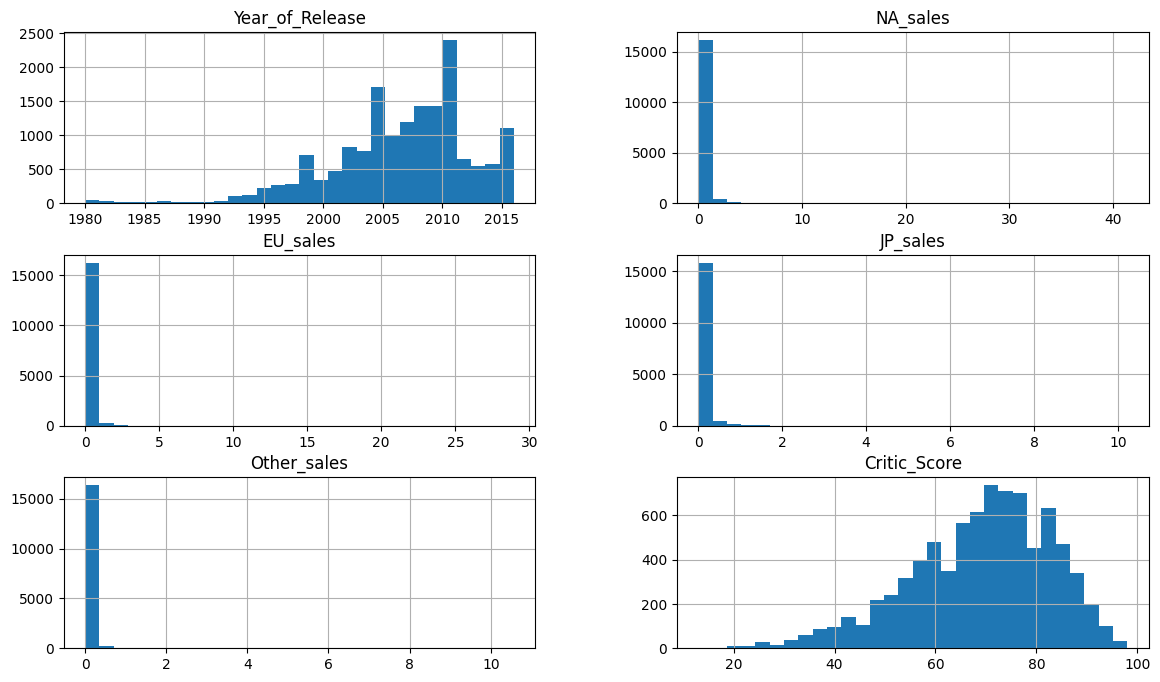

In [6]:
df.hist(bins=30, figsize=(14,8))

## Подготовка данных

### Редактируем названия столбцов

Приведем в нормальный вид названия столбцов

In [7]:
df.columns = df.columns.str.lower()

### Обрабатываем пропуски

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- В поле **name** всего 2 пропуска, их удаляем.
- Скорее всего ошибка ввода данных в базу.

In [9]:
df.loc[df.name.isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [10]:
df = df.loc[df.name.isna() == False].reset_index(drop=True)

- В некоторых названиях игр есть год выпуска.
- Извлечем год из колонки **name** и заменим пропуски в колонке **year_of_release**.
- Остальные записи с пропском года удалим, их немного.
- Причина пропусков, скорее всего ошибка ввода данных в БД

In [11]:
df['year_of_release'] = df['year_of_release'].fillna(df['name'].str.extract(r'(\d{4})$', expand=False))

In [12]:
df['rating'] = df['rating'].fillna('без рейтинга')

In [13]:
df = df.loc[df.year_of_release.isna() == False].reset_index(drop=True)

Пропуски в остальных колонках оставим, как есть, потому что оценки критиков, оценки пользователей и рейтинг - точные данные, их нельзя заменить на средние

В поле **user_score** есть значение "tdb"
> TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

То есть по сути это тот же NAN. Данное значение необходимо заменить на NAN, чтобы перевести значения колонки в тип float.

In [14]:
df.user_score = df.user_score.replace('tbd',np.nan)

### Меняем тип данных

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  object 
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   object 
 10  rating           16459 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


In [16]:
# год это целое число, float тут неуместен
df.year_of_release = df.year_of_release.astype('int')
# оценка пользователя - представлено цислом с плавающей точкой, значит здесь необходим тип float
df.user_score = df.user_score.astype('float')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int32  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           16459 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


## Исследовательский анализ

### Рассмотрим количество выпущенных игр по годам

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int32  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           16459 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [19]:
display(df.year_of_release.describe())
fig = px.histogram(df,x='year_of_release',nbins=30)
fig.show()

count    16459.000000
mean      2006.485084
std          5.873422
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

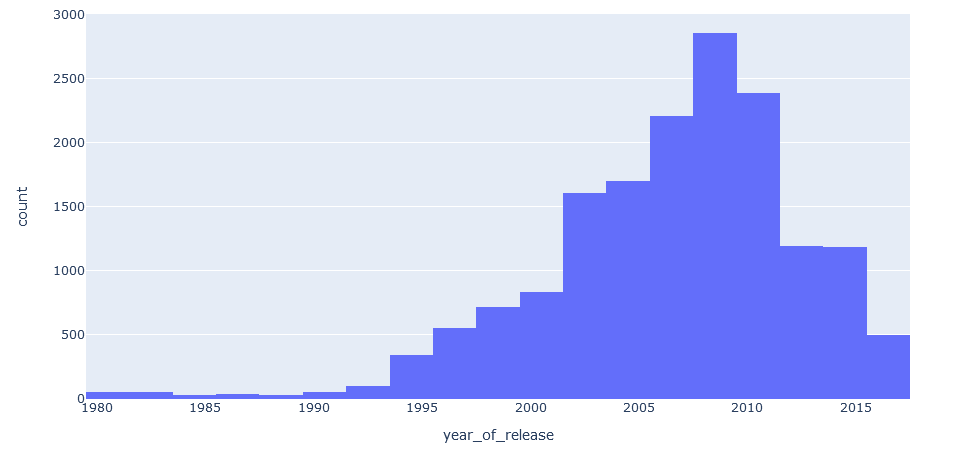

- 50% всех игр было выпущено в период с 2003 по 2010
- данными игр с годом выпуска до 1992 года можно принебречь, они слишкос растянуты и далеки от нормального распределения

### Рассмотрим зависимость и распределение продаж в зависимости от платформы

In [20]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
grouped_platform_year = df.groupby(['platform','year_of_release'])['sales'].sum().reset_index()

In [21]:
fig = px.bar(grouped_platform_year, y='sales', x='year_of_release', color='platform')
fig.show()

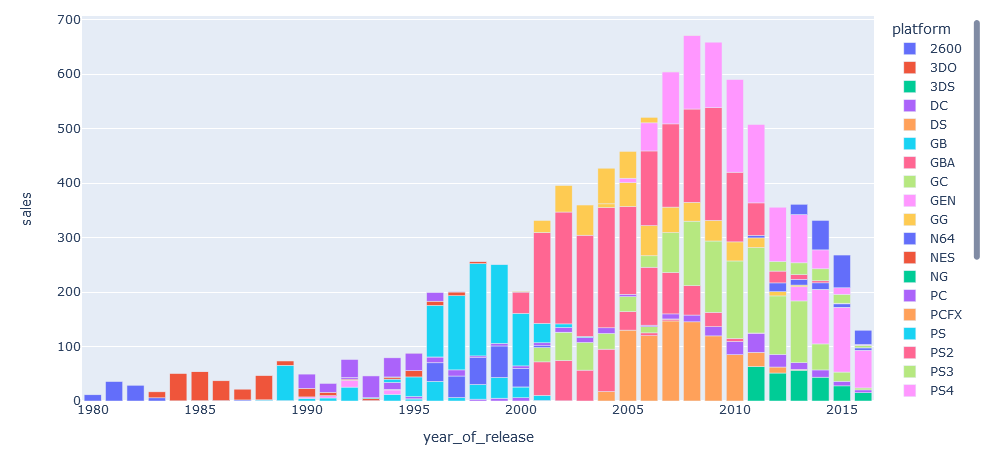

> На графике видно как платформы из год в год сменяли друг друга и видны лидеры продаж c большой долей рынка, например: PS-PS3, DS, X360

In [22]:
grouped_platform = df.groupby(['platform'])['sales'].sum().reset_index()

In [23]:
fig = px.bar(grouped_platform,x='platform',y='sales')
fig.show()

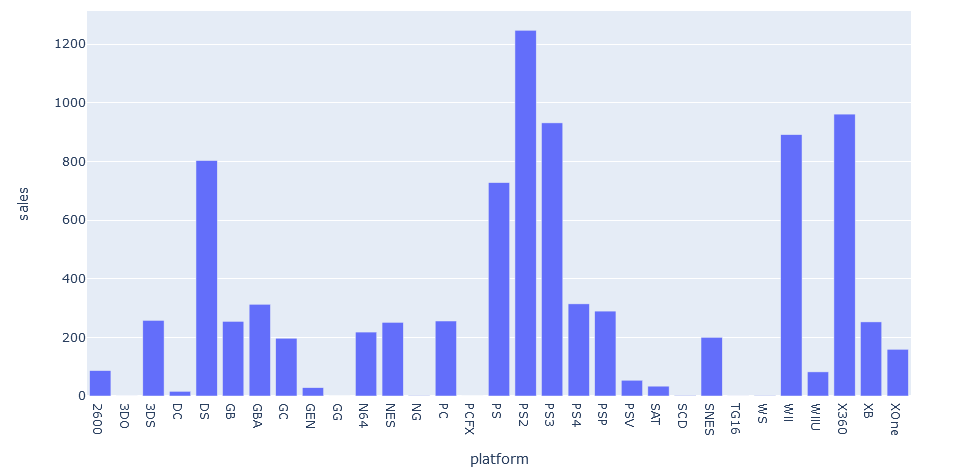

Платформы-лидеры продаж за все время:
- DS
- PS
- PS2
- PS3
- Wii
- X360

Рассмотрим продажи топ платформ в разрезе лет.

In [24]:
top_platforms = ["DS","PS","PS2","PS3","Wii","X360","PC"]
grouped_top_platform = df.query(f'platform in {top_platforms}').groupby(['platform','year_of_release'])['sales'].sum().reset_index()


In [25]:
fig = px.bar(grouped_top_platform, y='sales', x='year_of_release', color='platform')
fig.show()

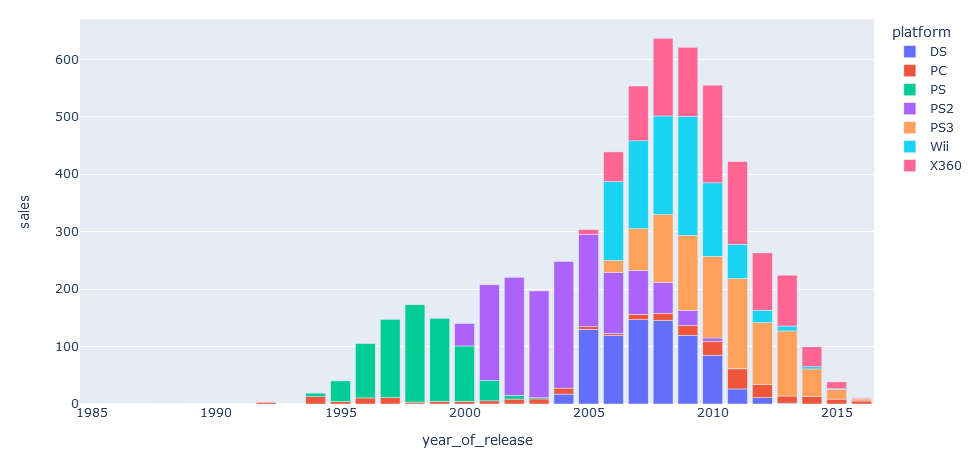

- Из графика видно, что в среднем цикл жизни платформы составляет 10 лет.

Для анализа возьмем период 2 года (2015-2016) - этого периода достаточно для прогнозирования.

In [26]:
df_actual = df.query('year_of_release >= 2015')
df_actual.year_of_release.value_counts()

2015    606
2016    502
Name: year_of_release, dtype: int64

In [27]:
df_actual.platform.value_counts()

PS4     301
PSV     195
XOne    167
3DS     132
PS3     111
PC      104
X360     48
WiiU     42
Wii       5
PSP       3
Name: platform, dtype: int64

Рассмотрим продажи данных платформ и выделим потенциально прибыльные.

In [28]:
df_actual_gr_sales = df_actual.groupby('platform')['sales'].sum()
df_actual_gr_sales.sort_values(ascending=False, inplace=True)

In [29]:
fig = px.bar(df_actual_gr_sales,
            labels={'value':'Продажи, млн','platform':'Платформа'},
            title='Продажи актуальных платформ')
fig.update_layout(showlegend=False)

fig.show()

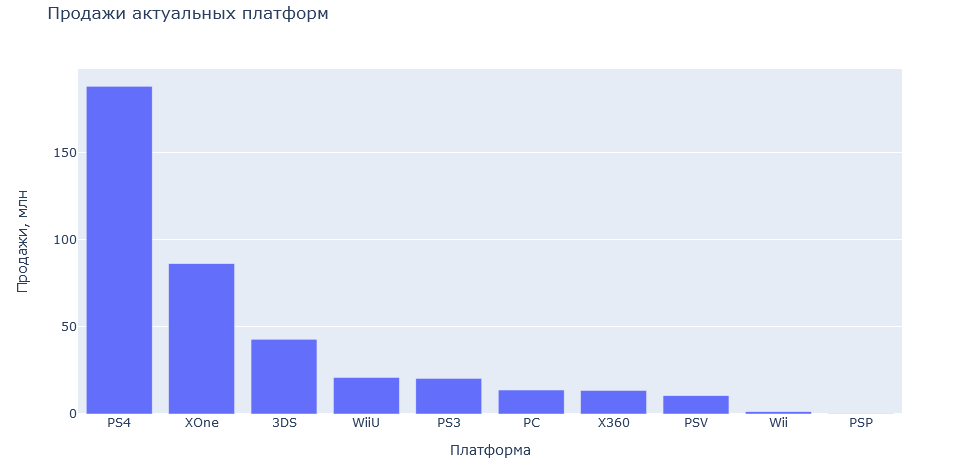

Самые крупные платформы по продажам: PS4, XOne и 3DC \
Построим графики динамики продаж по каждой платaорме по годам

In [30]:
def bar_creator(platform):
    df_platform = df_actual.query('platform == "'+ platform +'"')
    df_platform_grouped = df_platform.groupby('year_of_release')['sales'].sum()

    fig = px.bar(df_platform_grouped,
                 labels={'value':'Продажи, млн.','year_of_release':'Год релиза'})
    fig.update_layout(
        xaxis=dict(tickmode='linear'),
        title=f'Динамика продаж игр на платформе {platform}',
        showlegend=False)
    fig.show()

In [31]:
bar_creator('PS4')

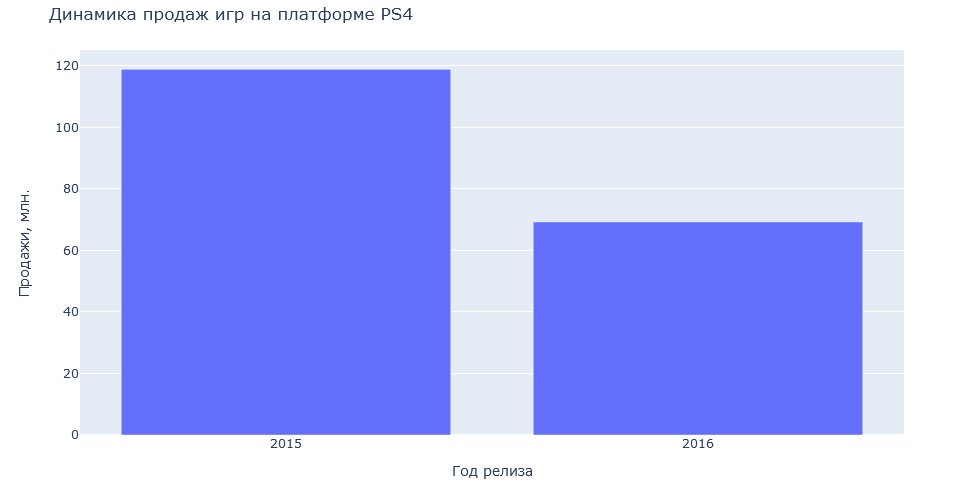

In [32]:
bar_creator('PSV')

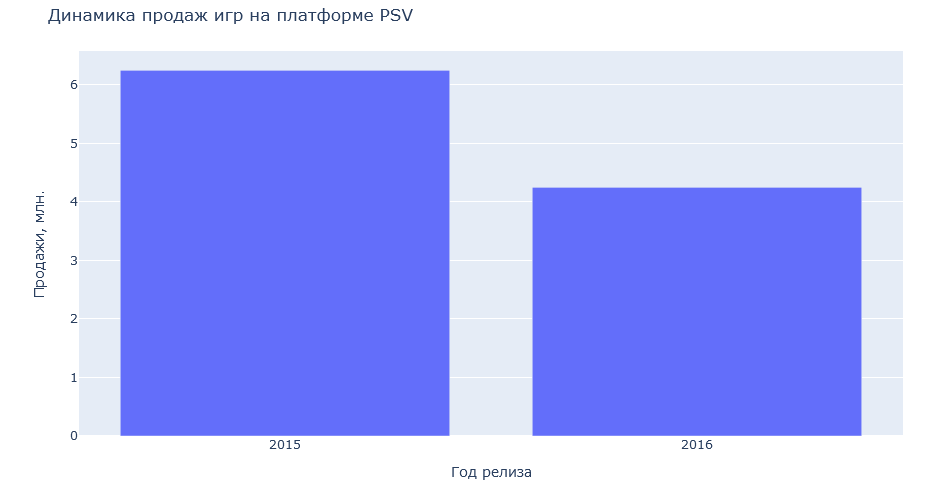

In [33]:
bar_creator('XOne')

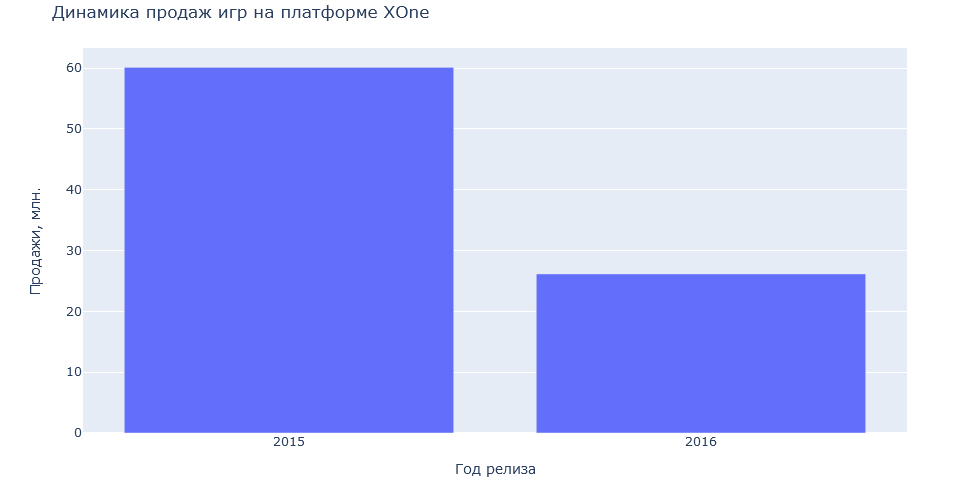

In [34]:
bar_creator('3DS')

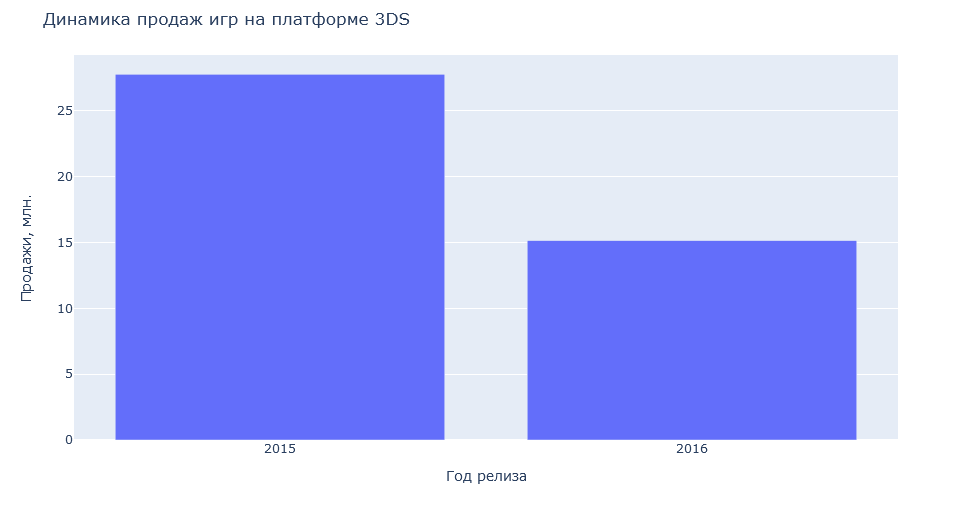

In [35]:
bar_creator('PS3')

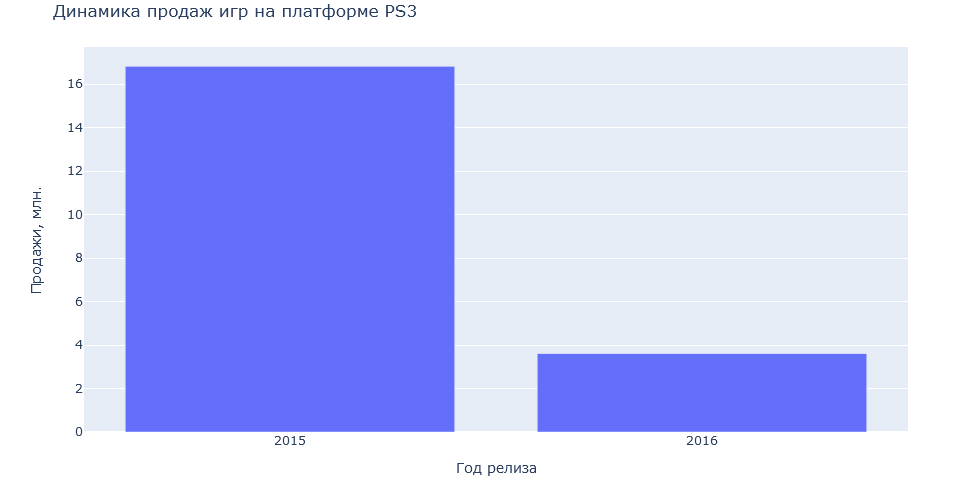

In [36]:
bar_creator('PC')

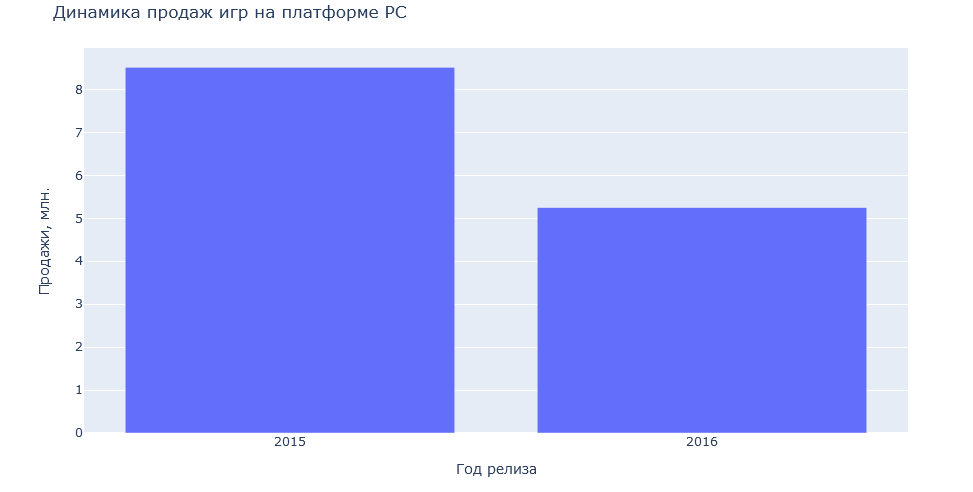

In [37]:
bar_creator('X360')

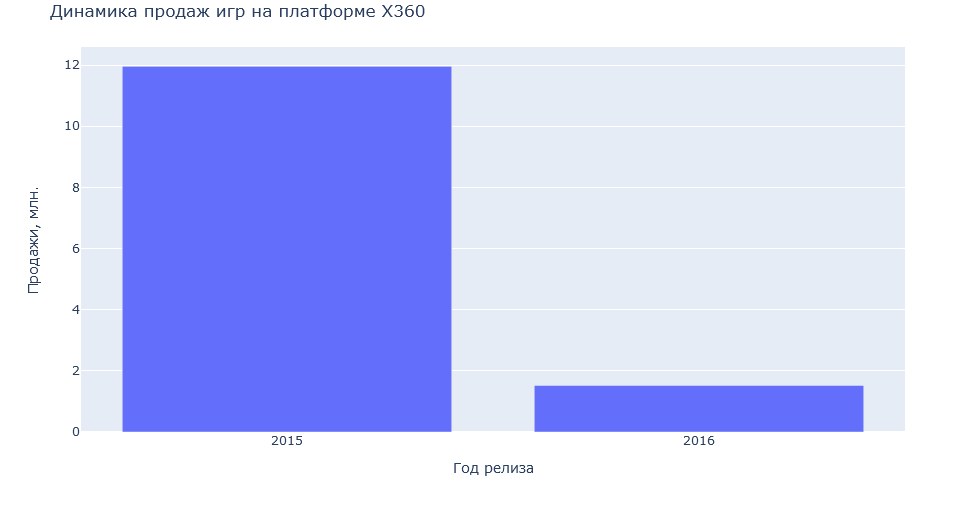

In [38]:
bar_creator('WiiU')

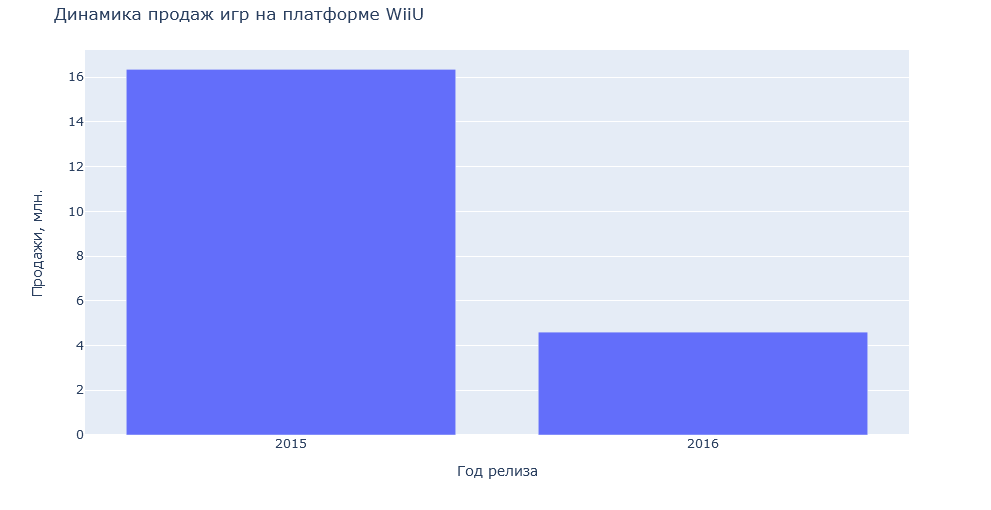

In [39]:
bar_creator('Wii')

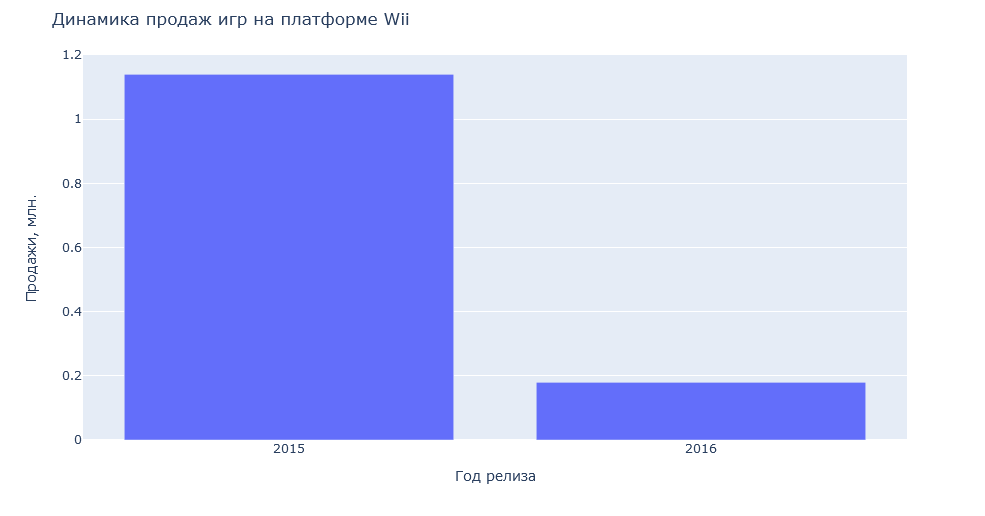

In [40]:
bar_creator('PSP')

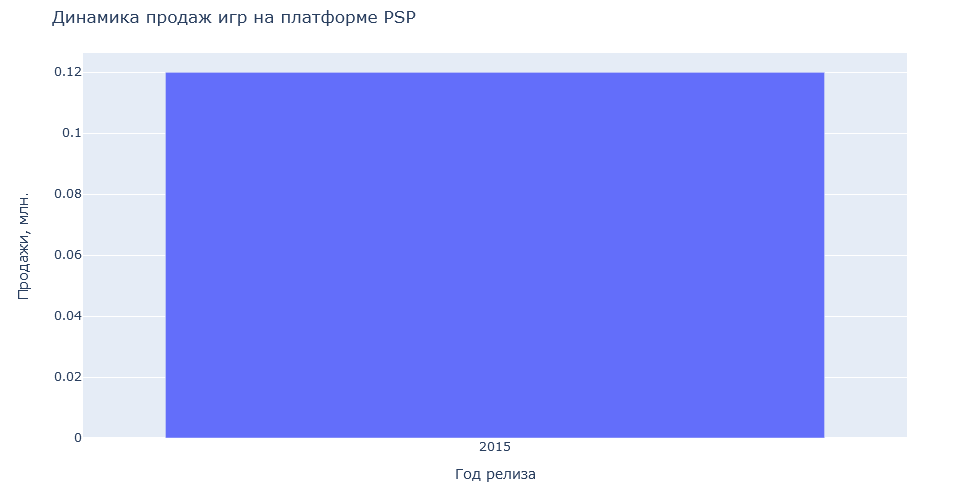

По всем платформам видим падение продаж к 2016 году (кроме SPS, у которой не было продаж в 2016 году) \
Поэтому перспективными будем считать платформы с наибольшими продажами в 2016 году: PS4 и XOne

In [41]:
ps4_sales = df_actual.query('platform == "PS4"')['sales']
xone_sales = df_actual.query('platform == "XOne"')['sales']

fig = go.Figure()
fig.add_trace(go.Box(y=ps4_sales, name='PS4'))
fig.add_trace(go.Box(y=xone_sales, name='XOne'))
fig.show()

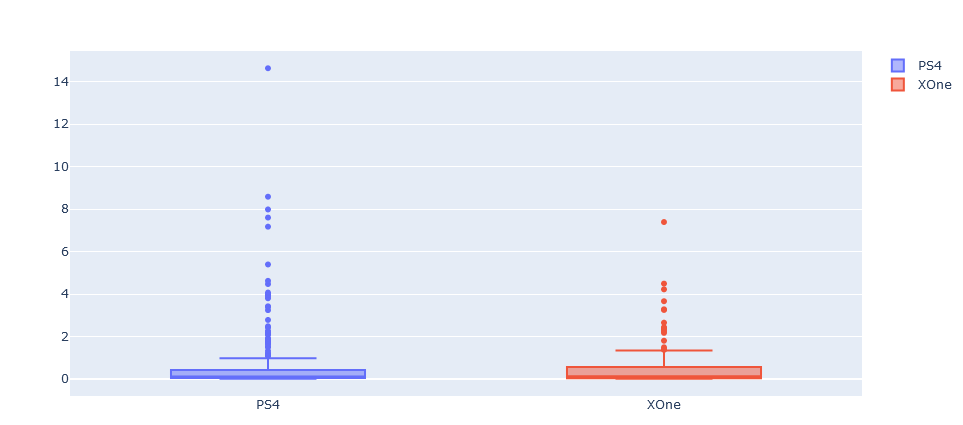

- Из графика видим, что распрделение у обеих платформ похожее
- Размеры коробки, медианы и размах "усов" практически равны (у XOne чуть больше максимально значение продаж 1.43 против 0.98 млн)
- У каждой платформы есть "мега популярные хиты продаж", об этом говорят выбросы за пределами "усов"
- Однако в у платформы PS4 больше выбросов по количеству и по величине продаж, что говорит, что у данной платформы больше "супер-популярных" игр

In [42]:
df_ps4_score = df_actual.query('platform == "PS4"')[['critic_score','user_score','sales']]

display(df_ps4_score[['sales','user_score']].corr())

fig = px.scatter(df_ps4_score,x='user_score',y='sales')
fig.show()

sales  user_score
sales       1.000000   -0.059738
user_score -0.059738    1.000000

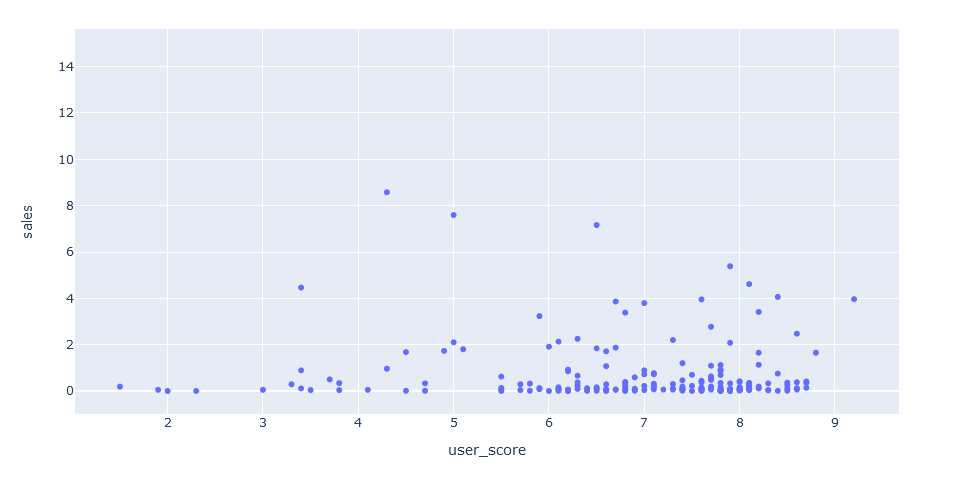

In [43]:
display(df_ps4_score[['sales','critic_score']].corr())

fig = px.scatter(df_ps4_score,x='critic_score',y='sales')
fig.show()

sales  critic_score
sales         1.000000      0.392849
critic_score  0.392849      1.000000

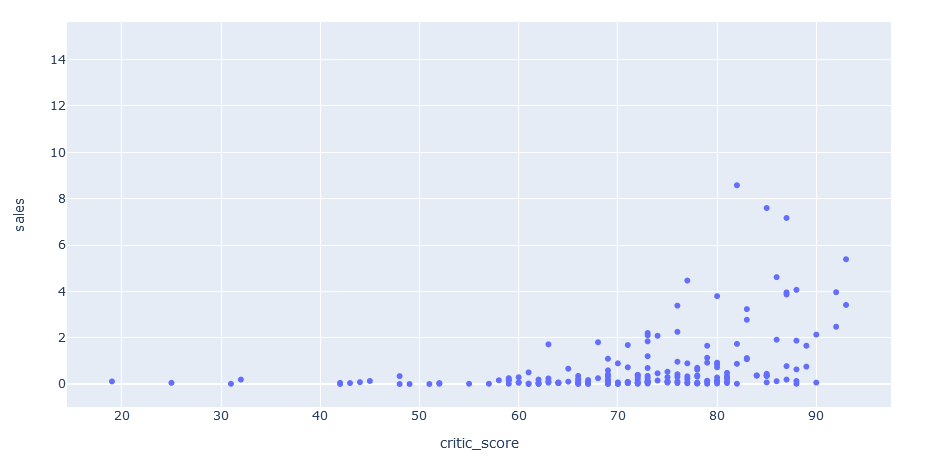

Из диаграмм рассеивания и показателей корреляции видим:
- зависимости продаж игры от отзывов пользователей отсутсвует
- зависимость продаж от отзывов критиков есть, но слабая 0.4

In [44]:
df_platform_grouped = df_actual.groupby('genre')['sales'].sum()
df_platform_grouped.sort_values(inplace=True)

fig = px.bar(df_platform_grouped,
             labels={'value':'Продажи, млн.','genre':'Жанр'})
fig.update_layout(
    title=f'Суммарных продаж в зависимости от жанра',
    showlegend=False)
fig.show()

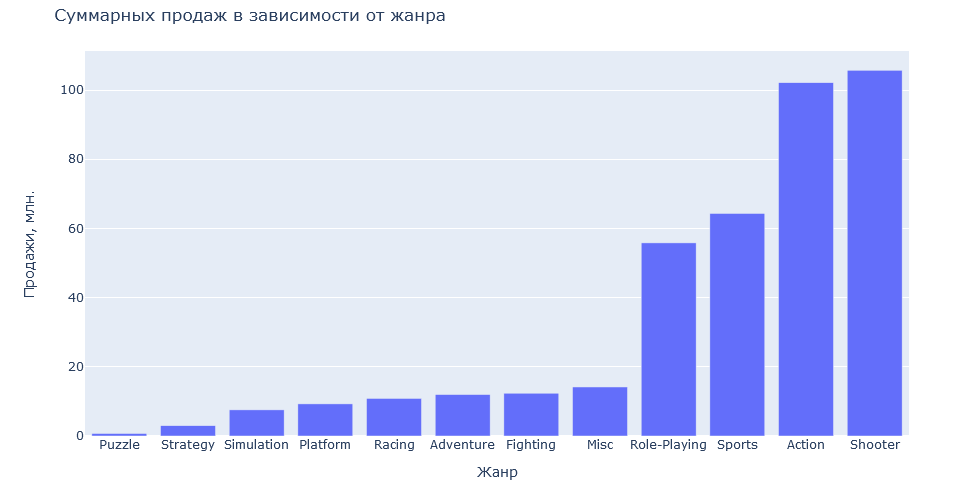

- Жанр с наибольшими суммарными продажами Shooter (в топ 3 так же входят жанры Action и Sports)
- Самые низкие суммарные продажи в жанре Puzzle

Для того, чтобы оценить популярность игр в разрезе жанров, сравним средние продажи 1 игры в каждом жанре

In [45]:
df_platform_grouped = df_actual.groupby('genre')['sales'].count()
df_platform_grouped.sort_values(inplace=True)

fig = px.bar(df_platform_grouped,
             labels={'value':'Продажи, млн.','genre':'Жанр'})
fig.update_layout(
    title=f'Количество игр в каждом жанре',
    showlegend=False)
fig.show()

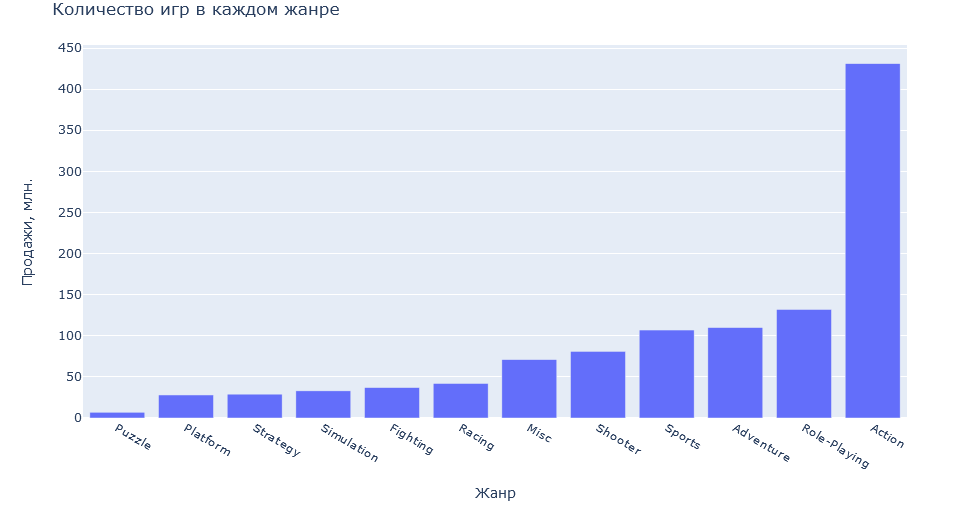

- Большие продажи в жанре Action обусловлены огромным количеством игр

In [46]:
df_platform_grouped = df_actual.groupby('genre')['sales'].median()
df_platform_grouped.sort_values(inplace=True)

fig = px.bar(df_platform_grouped,
             labels={'value':'Продажи, млн.','genre':'Жанр'})
fig.update_layout(
    title=f'Средние продажи одной игры в зависимости от жанра',
    showlegend=False)
fig.show()

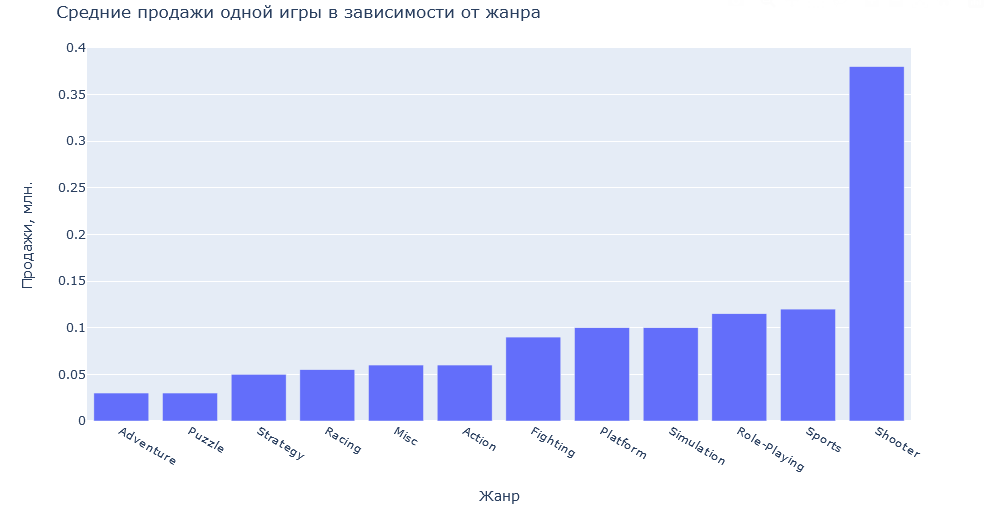

- средние продажи 1 игры в жанре Shooter в разы превосходит всех конкурентов
- так же в сравнении с жанром Action игры жанра Shooter в разы успешнее, потому что при меньшем в разы количеством игры, общие продажи у жанра Shooter выше

## Портрет пользователя в разрезе регионов

### Топ-5 популярных платформ в Северной Америке, Европе и Японии

In [47]:
fig = px.pie(df_actual, values='na_sales',
             names='platform',
            title='Продажи Северной Америки в разрезе платформ')
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

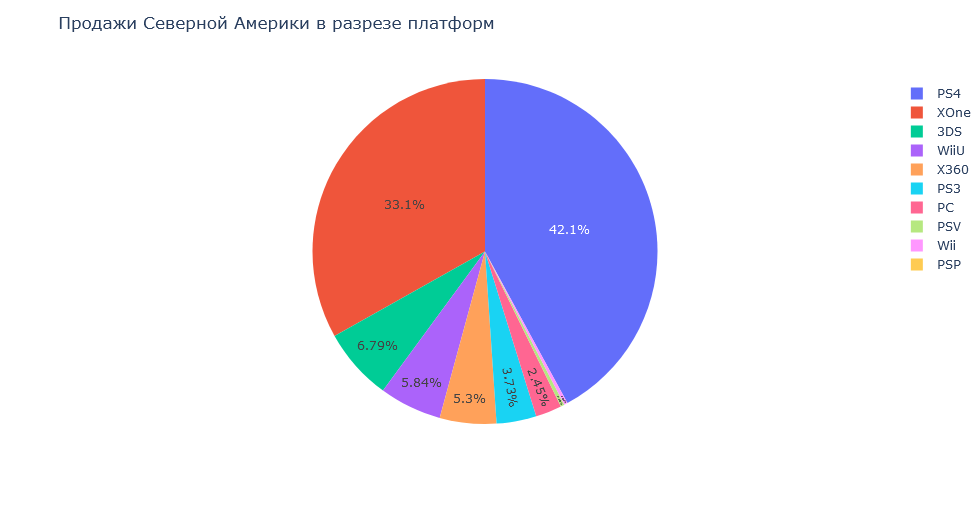

Топ-5 самых популярных платформ в Северной Америке:
1. PS4
2. XOne
3. 3DS
4. WiiU
5. X360

In [48]:
fig = px.pie(df_actual, values='eu_sales',
             names='platform',
            title='Продажи Европы в разрезе платформ')
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

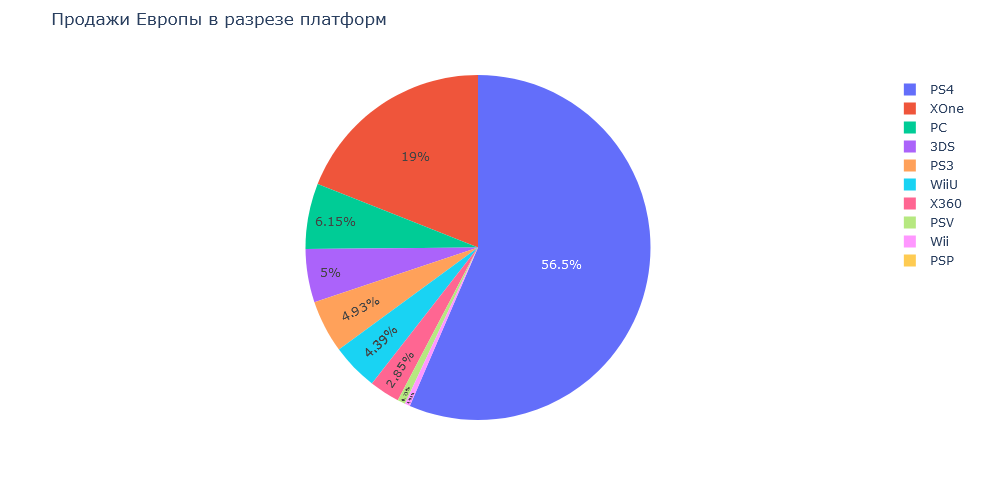

Топ-5 самых популярных платформ в Европе:
1. PS4
2. XOne
3. PC
4. 3DS
5. PS3

In [49]:
fig = px.pie(df_actual, values='jp_sales',
             names='platform',
            title='Продажи Японии в разрезе платформ')
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

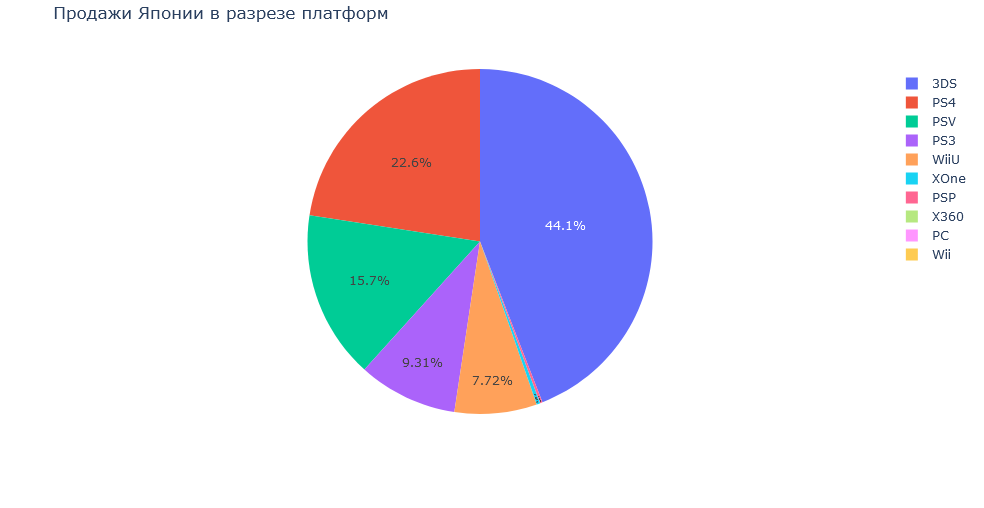

Топ-5 самых популярных платформ в Японии:
1. 3DS
2. PS4
3. PSV
4. PS3
5. WiiU

- Самыми популярными платформами в Америке и Европе являются PS4 и XOne
- И, если в Америке обе платыформы занимают примерно одинаковую долю рынка, то в Европе платформа PS4 в 3 раза больше XOne
- Так же вреди всех платформ PS4 в топе во всех регионах
- В Японии 3DS сместила с пьедистала PS4
- Так же в Японии 3 из 5 топ-платформ портативные, скорее всего потому что японцы чаще играют вне дома.

### Топ-5 популярных жанров в Северной Америке, Европе и Японии

In [50]:
fig = px.pie(df_actual, values='na_sales',
             names='genre',
            title='Продажи Северной Америки в разрезе платформ')
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

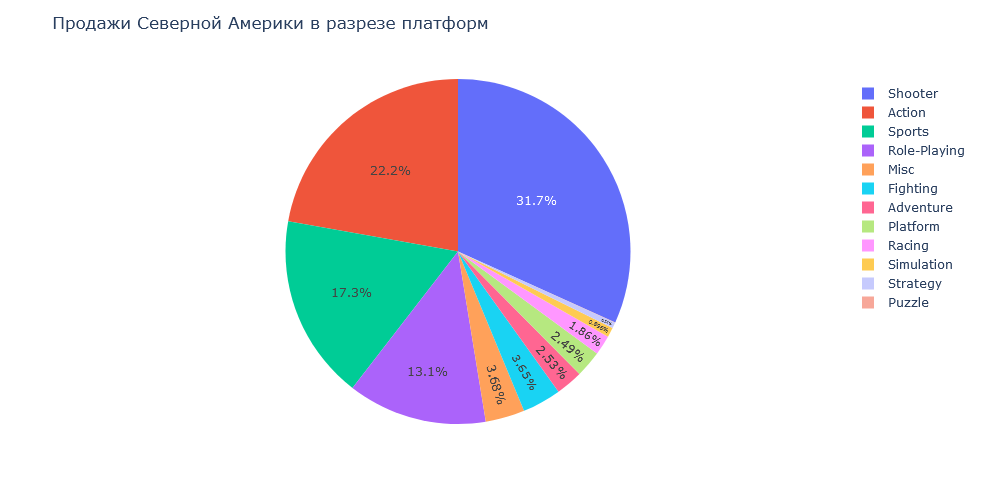

Топ-5 самых популярных жанров в Северной Америке:
1. Shooter
2. Action
3. Sports
4. Role_Plaing
5. Misc

In [51]:
fig = px.pie(df_actual, values='eu_sales',
             names='genre',
            title='Продажи Европы в разрезе платформ')
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

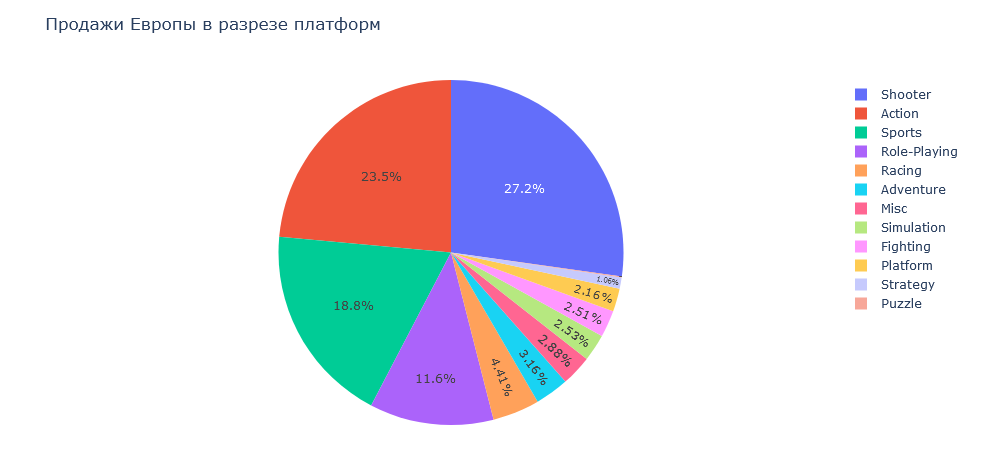

Топ-5 самых популярных жанров в Европе:
1. Shooter
2. Action
3. Sports
4. Role-Playing
5. Racing

In [52]:
fig = px.pie(df_actual, values='jp_sales',
             names='genre',
            title='Продажи Японии в разрезе платформ')
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

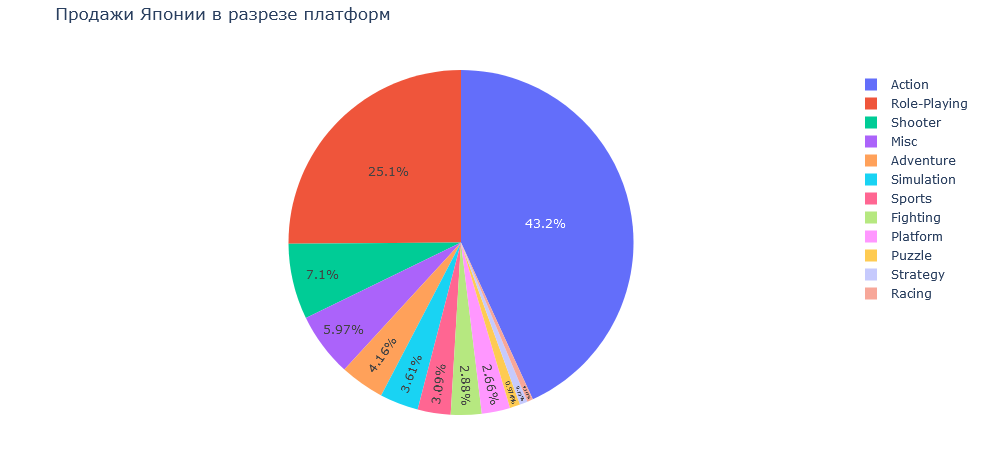

Топ-5 самых популярных жанров в Японии:
1. Action
2. Role-Playing
3. Shooter
4. Misc
5. Adventure

- Жанры Shooter, Action, Role_Playing - во всех регионах входят в Топ-5
- Жанр Shooter топ-1 в Америке и Европе, но в Японии сильно уступает жанру Action и Role_Playing
- В Америке и Европе так же популярен жанр Sports
- В то же время в Японии ту же популярность имеет жанр Adventure

### Влияние  рейтинга ESRB на продажи в регионе

In [53]:
df_platform_na = df_actual.groupby('rating')['na_sales'].sum()
df_platform_na.sort_values(inplace=True)

fig = px.bar(df_platform_na,
             labels={'rating':'Рейтинг','value':'Продажи, млн'})
fig.update_layout(
    title=f'Продажи Северной Америке в разрезе жанров',
    showlegend=False)
fig.show()

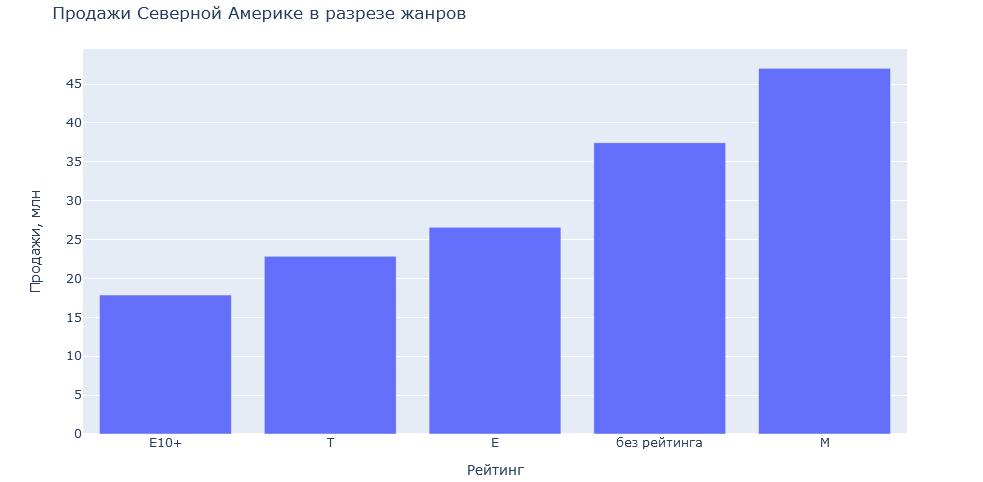

In [54]:
df_platform_na = df_actual.groupby('rating')['eu_sales'].sum()
df_platform_na.sort_values(inplace=True)

fig = px.bar(df_platform_na,
             labels={'rating':'Рейтинг','value':'Продажи, млн'})
fig.update_layout(
    title=f'Продажи Европы в разрезе жанров',
    showlegend=False)
fig.show()

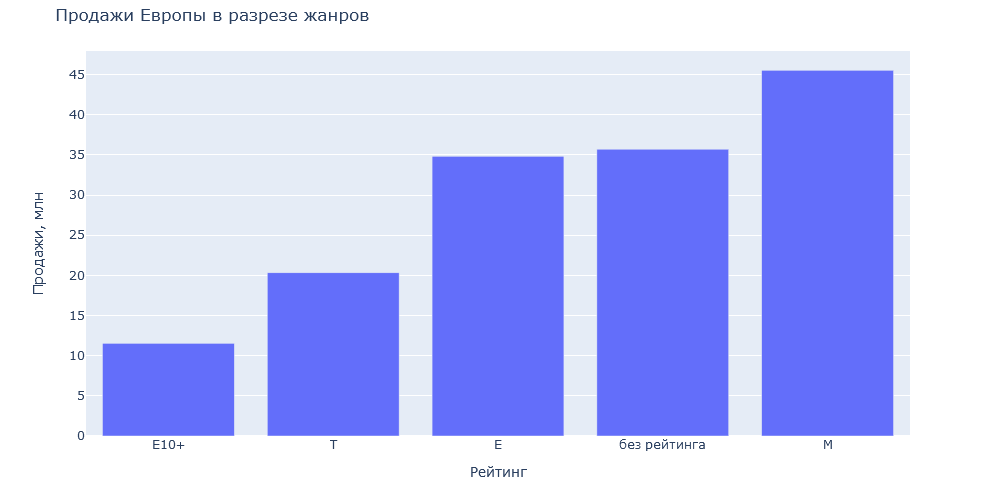

In [55]:
df_platform_na = df_actual.groupby('rating')['jp_sales'].sum()
df_platform_na.sort_values(inplace=True)

fig = px.bar(df_platform_na,
             labels={'rating':'Рейтинг','value':'Продажи, млн'})
fig.update_layout(
    title=f'Продажи Японии в разрезе жанров',
    showlegend=False)
fig.show()

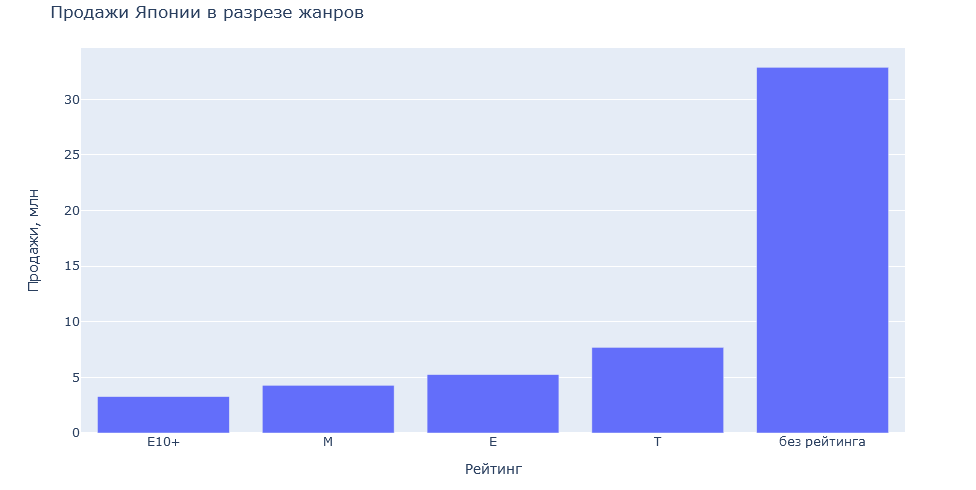

- В Америке и Европе схожее распределение продаж по рейтингам, лидер - игры "для взрослых" 17+, аутсадер - игры 10+
- Если предположить что "без рейтинга" - это игры которые еще не прошли оценку, то в Америке и Европе они на уровне с играми "для всех"
- В Японии игры "без рейтинга" занимают лидирующую позицию обогнав остальных в разы. Видимо в Японии игры с возрастным цензом не популярны
- Но если Японский рынок рассматривать исключая игры "без рейтинга", то распределение отличается от Европы и Америки. В топе игры "для тинейджеров" 13+


## Проверка гипотез

### Первая гепотеза.
*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Нулевая гепотеза:
> Средние пользовательские рейтинги платформ Xbox One и PC равны


> Альтернативная гепотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [56]:
xone_grouped = df_actual.query('platform == "XOne"')['user_score']
pc_grouped = df_actual.query('platform == "PC"')['user_score']

alpha = 0.05

results = st.ttest_ind(xone_grouped, pc_grouped, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.2778542084733886
Не получилось отвергнуть нулевую гипотезу


### Вторая гепотеза.
*Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

Нулевая гепотеза:
> Разницы между средними пользовательскими рейтингами жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») нет, они равны


Альтернативная гепотеза: 
> Разница между средними пользовательскими рейтингами жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») есть, они не равны

In [57]:
action_grouped = df_actual.query('genre == "Action"')['user_score']
sports_grouped = df_actual.query('genre == "Sports"')['user_score']

alpha = 0.05

results = st.ttest_ind(action_grouped, sports_grouped, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0012846807938657e-13
Отвергаем нулевую гипотезу


## Общие выводы

50% всех игр было выпущено в период с 2003 по 2010.

Платформы-лидеры продаж за все время:
- DS
- PS
- PS2
- PS3
- Wii
- X360


Средний цикл жизни (актульаности) платформы составляет 10 лет. \
Самые крупные (из перспективных) платформы по продажам: PS4, 3DS и PC. \
Так как по всем платформам видим падение продаж к 2016 году, \
то перспективными будем считать платформы с наибольшими продажами в 2016 году: PS4 и XOne \

Из диаграммы "коробка с усами" видим:

- Из графика видим, что распрделение у обеих платформ похожее
- Размеры коробки, медианы и размах "усов" практически равны (у XOne чуть больше максимально значение продаж 1.43 против 0.98 млн)
- У каждой платформы есть "мега популярные хиты продаж", об этом говорят выбросы за пределами "усов"
- Однако в у платформы PS4 больше выбросов по количеству и по величине продаж, что говорит, что у данной платформы больше "супер-популярных" игр


Из диаграмм рассеивания и показателей корреляции моно сделать выводы:
- зависимости продаж игры от отзывов пользователей отсутсвует
- зависимость продаж от отзывов критиков есть, но слабая 0.4


Оценка зависимости продаж от жанра игры показала:
- Жанр с наибольшими суммарными продажами Shooter (в топ 3 так же входят жанры Action и Sports)
- Самые низкие суммарные продажи в жанре Puzzle
- Большие продажи в жанре Action обусловлены огромным количеством игр
- Средние продажи 1 игры в жанре Shooter в разы превосходит всех конкурентов
- Так же в сравнении с жанром Action игры жанра Shooter в разы успешнее, потому что при меньшем в разы количеством игры, общие продажи у жанра Shooter выше



Топ-5 самых популярных платформ в Северной Америке:
1. PS4
2. XOne
3. 3DS
4. WiiU
5. X360


Топ-5 самых популярных платформ в Европе:
1. PS4
2. XOne
3. PC
4. 3DS
5. PS3


Топ-5 самых популярных платформ в Японии:
1. 3DS
2. PS4
3. PSV
4. PS3
5. WiiU


- Самыми популярными платформами в Америке и Европе являются PS4 и XOne
- И, если в Америке обе платыформы занимают примерно одинаковую долю рынка, то в Европе платформа PS4 в 3 раза больше XOne
- Так же вреди всех платформ PS4 в топе во всех регионах
- В Японии 3DS сместила с пьедистала PS4
- Так же в Японии 3 из 5 топ-платформ портативные, скорее всего потому что японцы чаще играют вне дома.


Топ-5 самых популярных жанров в Северной Америке:
1. Shooter
2. Action
3. Sports
4. Role_Plaing
5. Misc


Топ-5 самых популярных жанров в Европе:
1. Shooter
2. Action
3. Sports
4. Role-Playing
5. Racing


Топ-5 самых популярных жанров в Японии:
1. Action
2. Role-Playing
3. Shooter
4. Misc
5. Adventure


- Жанры Shooter, Action, Role_Playing - во всех регионах входят в Топ-5
- Жанр Shooter топ-1 в Америке и Европе, но в Японии сильно уступает жанру Action и Role_Playing
- В Америке и Европе так же популярен жанр Sports
- В то же время в Японии ту же популярность имеет жанр Adventure


При рассмотрении продаж в разрезе рейтинга ESRB, стало понятно, что:
- В Америке и Европе схожее распределение продаж по рейтингам, лидер - игры "для взрослых" 17+, аутсадер - игры 10+
- Если предположить что "без рейтинга" - это игры которые еще не прошли оценку, то в Америке и Европе они на уровне с играми "для всех"
- В Японии игры "без рейтинга" занимают лидирующую позицию обогнав остальных в разы. Видимо в Японии игры с возрастным цензом не популярны
- Но если Японский рынок рассматривать исключая игры "без рейтинга", то распределение отличается от Европы и Америки. В топе игры "для тинейджеров" 13+


Результаты статистической проверки гепотез:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - **не отвергаем данную гепотезу**
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - **отвергаем данную гепотезу**
